In [1]:
from math import*
from numpy import*
import matplotlib
from pylab import *
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pylab import*
from scipy.stats import gamma
from cartopy.feature import NaturalEarthFeature

import os
import glob
import netCDF4
import pandas as pd
import xarray as xr
import xarray as xarray

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from netCDF4 import Dataset

In [108]:
listfile = glob.glob('Tanggal 28/*.nc')
listfile = sorted(listfile)
pathfile = np.array(listfile)

In [109]:
# baca semua lokasi data Himawari
import glob

path = glob.glob('Tanggal 28/*.nc', recursive=True)

pathfiles = []
for filename in path:
    pathfiles.append(filename)
pathfiles = np.array(pathfiles)

In [110]:
# baca semua data Thimawari dan ambil variable tbb_13

nt = pathfiles.size
hm = np.empty(shape=(nt,921,341))

for i in range(nt):
    data = Dataset(pathfiles[i])
    hm[i,:,:] = data['tbb_13'][:].T
hm_cut= hm[:, 230:260 ,233:240]
#hm_cut

In [111]:
pd.date_range(start= '2021-12-28 18:00:00', periods=72, freq="10min")

DatetimeIndex(['2021-12-28 18:00:00', '2021-12-28 18:10:00',
               '2021-12-28 18:20:00', '2021-12-28 18:30:00',
               '2021-12-28 18:40:00', '2021-12-28 18:50:00',
               '2021-12-28 19:00:00', '2021-12-28 19:10:00',
               '2021-12-28 19:20:00', '2021-12-28 19:30:00',
               '2021-12-28 19:40:00', '2021-12-28 19:50:00',
               '2021-12-28 20:00:00', '2021-12-28 20:10:00',
               '2021-12-28 20:20:00', '2021-12-28 20:30:00',
               '2021-12-28 20:40:00', '2021-12-28 20:50:00',
               '2021-12-28 21:00:00', '2021-12-28 21:10:00',
               '2021-12-28 21:20:00', '2021-12-28 21:30:00',
               '2021-12-28 21:40:00', '2021-12-28 21:50:00',
               '2021-12-28 22:00:00', '2021-12-28 22:10:00',
               '2021-12-28 22:20:00', '2021-12-28 22:30:00',
               '2021-12-28 22:40:00', '2021-12-28 22:50:00',
               '2021-12-28 23:00:00', '2021-12-28 23:10:00',
               '2021-12-

In [112]:
Data = Dataset('Tanggal 1/Indo_Des21_01_1100.nc')
lat = Data.variables['latitude'][:]
lon = Data.variables['longitude'][:]

In [113]:
bx = lat[230:260]
by = lon[233:240]

In [115]:
ds = xr.Dataset(
     {"databaru": (("time", "lat", "lon"), hm_cut)},
    coords={
    "time": pd.date_range(start= '2021-12-28 18:00:00', periods=72, freq="10min"),
    "lat": bx,
    "lon": by, 
    },
    )

In [116]:
ds

<xarray.Dataset>
Dimensions:   (lat: 30, lon: 7, time: 72)
Coordinates:
  * time      (time) datetime64[ns] 2021-12-28T18:00:00 ... 2021-12-29T05:50:00
  * lat       (lat) float32 -5.5 -5.550003 -5.5999985 ... -6.9000015 -6.9500046
  * lon       (lon) float32 106.65 106.7 106.75 106.8 106.85 106.9 106.95
Data variables:
    databaru  (time, lat, lon) float64 259.9 276.4 275.7 ... 214.0 214.1 210.3

In [117]:
ds.to_netcdf("Tanggal_28.nc")

In [118]:
import numpy as np
import metpy as mp
import pandas as pd
import xarray as xr
import matplotlib.patches as patches
import scipy.fft as scf
import scipy.signal as ssg
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import cartopy.crs as ccrs
import itertools as itr

In [119]:
#Membuka dan Membaca Data NC dengan xarray
data_awan=xr.open_dataset('Tanggal_28.nc').databaru
data_awan

<xarray.DataArray 'databaru' (time: 72, lat: 30, lon: 7)>
array([[[259.919983, 276.350006, ..., 259.109985, 261.160004],
        [271.699982, 277.279999, ..., 256.769989, 262.23999 ],
        ...,
        [258.570007, 258.190002, ..., 269.329987, 259.339996],
        [260.519989, 254.970001, ..., 264.23999 , 257.359985]],

       [[271.269989, 275.279999, ..., 256.889984, 260.220001],
        [281.059998, 271.540009, ..., 261.869995, 265.559998],
        ...,
        [259.299988, 257.399994, ..., 269.869995, 251.299988],
        [260.899994, 255.009995, ..., 263.589996, 247.619995]],

       ...,

       [[228.559998, 227.259995, ..., 221.009995, 219.660004],
        [230.069992, 227.009995, ..., 219.729996, 219.579987],
        ...,
        [225.410004, 221.849991, ..., 209.73999 , 208.380005],
        [226.690002, 224.429993, ..., 211.649994, 209.470001]],

       [[230.789993, 228.12999 , ..., 221.919998, 221.429993],
        [232.069992, 227.699997, ..., 220.449997, 222.470001],
        ...,
        [226.690002, 222.87999 , ..., 213.410004, 210.619995],
        [229.109985, 229.049988, ..., 214.149994, 210.269989]]])
Coordinates:
  * time     (time) datetime64[ns] 2021-12-28T18:00:00 ... 2021-12-29T05:50:00
  * lat      (lat) float32 -5.5 -5.550003 -5.5999985 ... -6.9000015 -6.9500046
  * lon      (lon) float32 106.65 106.7 106.75 106.8 106.85 106.9 106.95

In [120]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr

C:\Users\LENOVO\anaconda3\lib\site-packages\xarray\plot\plot.py:934: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)


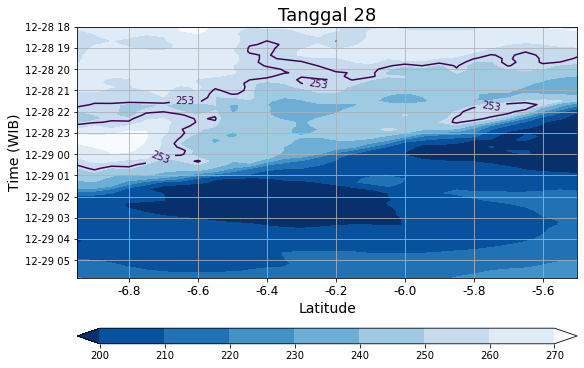

In [121]:
fig, (ax1) = plt.subplots( figsize=(8,5), constrained_layout=True)
slice_time = slice('2021-12-28 18:00:00','2021-12-29 06:00:00')
#slice_lat  = lat
#slice_lon  = lon


fft = data_awan.sel(time=slice_time, lat=bx, lon=by).mean(dim='lon')\
             .plot.contourf(ax=ax1, levels=np.arange(200,280,10), cmap='Blues_r', add_colorbar= False )
c = data_awan.sel(time=slice_time, lat=bx, lon=by)\
    .mean(dim='lon').plot.contour(ax=ax1,levels=[253], color='b')
plt.clabel(c, fmt='%d')
plt.gca().invert_yaxis()

#ax1.set_yticklabels(ax1.get_yticks(), size = 10)
ax1.set_xticklabels(ax1.get_xticks(), size = 12)

ax1.set_title('Tanggal 28', loc='center', fontsize=18)
ax1.set_xlabel("Latitude", fontsize = 14)
ax1.set_ylabel("Time (WIB)", fontsize = 14)
ax1.grid()

fig.colorbar(fft , ax= ax1, shrink=1, location='bottom')

#plt.suptitle('Hovmoller Himawari Tanggal 1',weight='bold')